In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 4 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
#     print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 4 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
            print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
#     print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 5 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 3) % 5 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
#     print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
#     print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [5]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(__list__, test_acc_list, marker='s', label='test accuracy', c='r')
    ax.plot(__list__, sparsity_list, marker='v', label='sparsity', c='g')
    ax.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [6]:
hidden_layer_neurons = [64, 128, 256, 384, 512, 768, 1024]

# Subplots

In [7]:
def subplots(sgd, adadelta, adagrad, adam, testing=False):
    fig, ax = plt.subplots(figsize=(7,7))
    
    ax.plot(hidden_layer_neurons, sgd, marker='o', label='sgd', c='red')
    ax.plot(hidden_layer_neurons, adadelta, marker='o', label='adadelta', c='blue')
    ax.plot(hidden_layer_neurons, adagrad, marker='o', label='adagrad', c='green')
    ax.plot(hidden_layer_neurons, adam, marker='o', label='adam', c='violet')
    if testing==True:
        ax.set_ylim([0.85, 1])
    else:
        ax.set_ylim([-0.1,1.1])
    ax.legend(loc='best')
    
    ax.grid()
    plt.show()

In [8]:
def subplots_spar_selec(sgd_spar, adadelta_spar, adagrad_spar, adam_spar, 
                        sgd_selec, adadelta_selec, adagrad_selec, adam_selec):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    
    ax1.plot(hidden_layer_neurons, sgd_spar, marker='o', label='sgd spar', c='red')
    ax1.plot(hidden_layer_neurons, adadelta_spar, marker='o', label='adadelta spar', c='blue')
    ax1.plot(hidden_layer_neurons, adagrad_spar, marker='o', label='adagrad spar', c='green')
    ax1.plot(hidden_layer_neurons, adam_spar, marker='o', label='adam spar', c='violet')
    
    ax2.plot(hidden_layer_neurons, sgd_selec, marker='o', label='sgd selec', c='red')
    ax2.plot(hidden_layer_neurons, adadelta_selec, marker='o', label='adadelta selec', c='blue')
    ax2.plot(hidden_layer_neurons, adagrad_selec, marker='o', label='adagrad selec', c='green')
    ax2.plot(hidden_layer_neurons, adam_selec, marker='o', label='adam selec', c='violet')
    
    ax1.set_ylim([0,1.0])
    ax2.set_ylim([0,1.0])
        
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    
    ax1.grid()
    ax2.grid()
    
    plt.show()

# Graph 

In [9]:
def plotter(optimizer_name, flag=False):
    test_vals  = test_val_extractor(f'neurons_sparsity_{optimizer_name}.txt')
    sparsities = sparsity_val_extractor(f'neurons_sparsity_{optimizer_name}.txt')
    selectivity_average, selectivity_std = selectivity_val_extractor(f"neurons_selectivity_{optimizer_name}.txt")
    
    if flag==False:
        all_plotter(hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')
    
    if flag==True:
        return hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std

In [10]:
hln_sgd,      test_acc_sgd,      spar_sgd,      selec_avg_sgd,      selec_std_sgd      = plotter('SGD', flag=True)
hln_Adadelta, test_acc_Adadelta, spar_Adadelta, selec_avg_Adadelta, selec_std_Adadelta = plotter('Adadelta', flag=True)
hln_Adagrad,  test_acc_Adagrad,  spar_Adagrad,  selec_avg_Adagrad,  selec_std_Adagrad  = plotter('Adagrad', flag=True)
hln_Adam    , test_acc_Adam    , spar_Adam    , selec_avg_Adam    , selec_std_Adam     = plotter('Adam', flag=True)

# Compare

In [11]:
def compare(optimizer_name):
    print(f'\n==============={optimizer_name}===============')
    hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} first (64): Test acc={test_vals[0]:.3f}, Spar={sparsities[0]:.3f}, Selec avg={selectivity_average[0]:.3f}, Selec std={selectivity_std[0]:.3f}")
    print(f"{optimizer_name} last(1024): Test acc={test_vals[-1]:.3f}, Spar={sparsities[-1]:.3f}, Selec avg={selectivity_average[-1]:.3f}, Selec std={selectivity_std[-1]:.3f}")
    print()
    print("test deviation: 1024 - 64(original):", test_vals[-1] - test_vals[0])
    print("sparsity deviation: 1024 - 64(original):", sparsities[-1] - sparsities[0])
    print("selectivity deviation: 1024 - 64(original):", selectivity_average[-1] - selectivity_average[0])
    print()
    print("test % difference: 1024 / 64(original):", (test_vals[-1] / test_vals[0]) * 100)
    print("sparsity % difference: 1024 / 64(original):", (sparsities[-1] / sparsities[0]) * 100)
    print("selectivity % difference: 1024 / 64(original):", (selectivity_average[-1] / selectivity_average[0]) * 100)


In [12]:
compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD first (64): Test acc=0.970, Spar=0.250, Selec avg=0.349, Selec std=0.187
SGD last(1024): Test acc=0.966, Spar=0.172, Selec avg=0.289, Selec std=0.133

test deviation: 1024 - 64(original): -0.0031999999999999806
sparsity deviation: 1024 - 64(original): -0.07800000000000001
selectivity deviation: 1024 - 64(original): -0.06024968738804609

test % difference: 1024 / 64(original): 99.66996699669967
sparsity % difference: 1024 / 64(original): 68.8
selectivity % difference: 1024 / 64(original): 82.72914917589007

===============Adadelta===============
Adadelta first (64): Test acc=0.976, Spar=0.313, Selec avg=0.376, Selec std=0.175
Adadelta last(1024): Test acc=0.982, Spar=0.401, Selec avg=0.445, Selec std=0.146

test deviation: 1024 - 64(original): 0.005099999999999993
sparsity deviation: 1024 - 64(original): 0.08849999999999997
selectivity deviation: 1024 - 64(original): 0.0690881331198897

test % difference: 1024 / 64(original): 100.52232691519869
spa

# Test

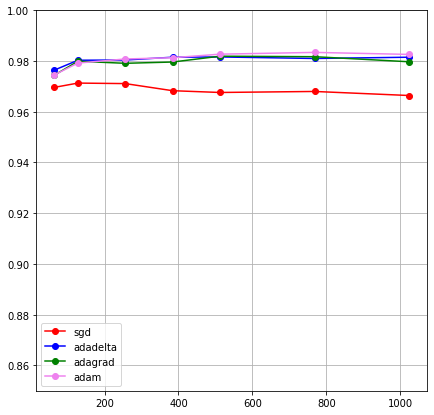

In [13]:
subplots(test_acc_sgd, 
         test_acc_Adadelta, 
         test_acc_Adagrad, 
         test_acc_Adam, 
         testing=True)

# Sparsity and Selectivity

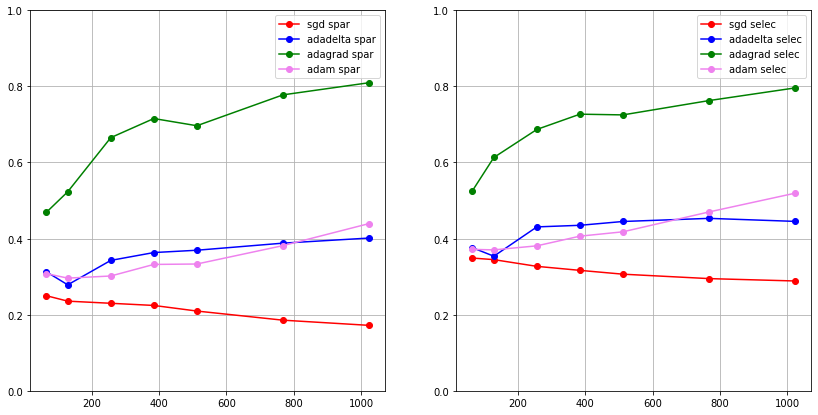

In [14]:
subplots_spar_selec(spar_sgd, spar_Adadelta, spar_Adagrad, spar_Adam, 
                    selec_avg_sgd, selec_avg_Adadelta, selec_avg_Adagrad, selec_avg_Adam, 
                   )

# SGD

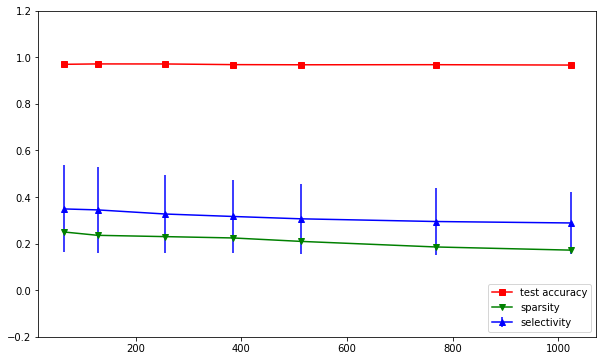

In [15]:
plotter('SGD')

# Adadelta

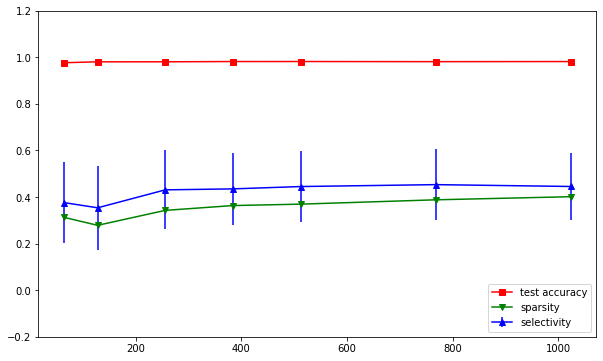

In [16]:
plotter('Adadelta')

# Adagrad

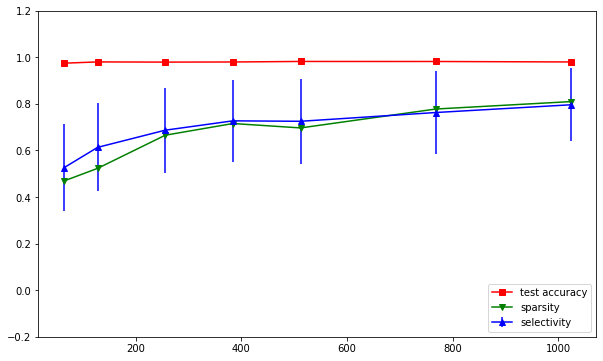

In [17]:
plotter('Adagrad')

# Adam

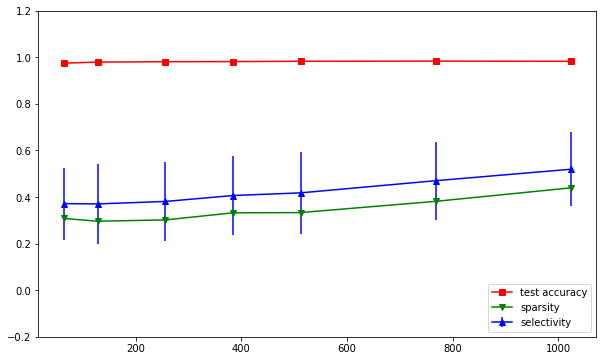

In [18]:
plotter('Adam')